# Kmeans(基于划分)

轮廓系数结合了聚类的凝聚度和分离度，用于评估聚类的效果。该值取值范围为[-1 ,1]， 越接近1则说明分类越优秀。在sklearn中函数silhouette_score()计算所有点的平均轮廓系数，而silhouette_samples()返回每个点的轮廓系数

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
data = pd.read_csv("data/实验报告数据/data_clustering.csv")
data.head()
# data = data.iloc[:,[1,2,3,4,5,6,7]]
data = data.drop("Unnamed: 0",axis=1)
data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7
0,6.572897,-5.172835,2.741810,-2.273339,-5.050879,5.292106,3.226456
1,-7.156458,-5.985348,-5.031591,-4.150187,-8.233108,-4.271970,12.694242
2,-4.631283,1.043873,-1.362041,-8.999582,-7.406887,-1.848032,12.250691
3,-5.046997,-1.415594,-5.699884,-6.161301,-6.949402,0.926790,11.114728
4,-10.353180,-1.018143,-3.243667,-2.366646,-8.209471,-0.859586,10.090310
...,...,...,...,...,...,...,...
995,1.292512,-3.053487,-1.608255,5.926220,-1.055869,-0.140977,7.845729
996,5.170071,-6.223113,0.096070,-1.767872,-4.392483,3.590092,2.785955
997,-6.490728,3.006837,-3.119469,-4.538567,-8.268932,-3.150140,10.837032
998,-7.691789,1.130620,-4.187140,-4.646578,-9.355274,2.530622,8.928828


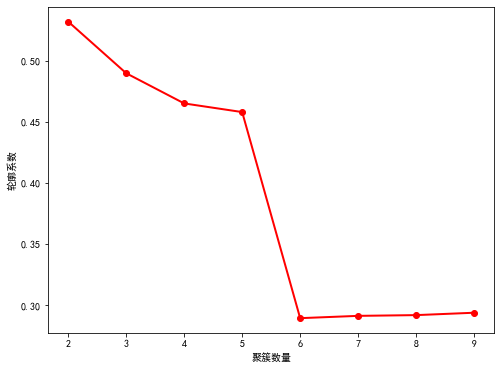

In [14]:
# 计算轮廓系数,寻找最优解K
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(8,6))

sc=[]
for i in range(2,10):
    cluster_=KMeans(n_clusters=i,random_state=0).fit(data)
    y_pre=cluster_.labels_
    sc_=silhouette_score(data,y_pre)
    sc.append(sc_)
plt.plot(range(2,10),sc,color='red',linewidth=2.0,marker='o')
plt.ylabel("轮廓系数")
plt.xlabel("聚簇数量")
plt.show()

In [15]:
from sklearn.cluster import KMeans
# 最优解 k = 2
km = KMeans(n_clusters=2)
km.fit(data)
data['cluster'] = km.labels_
# 各类频数统计
data.cluster.value_counts()

1    664
0    336
Name: cluster, dtype: int64

In [16]:
# 轮廓系数
sil = silhouette_score(data,data['cluster']).round(3)
print("轮廓系数为:%s" % sil)

轮廓系数为:0.532


In [17]:
data = data.drop("cluster",axis=1)
# 使用PCA对数据将维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)
print(type(data))


<class 'numpy.ndarray'>


In [18]:
data = pd.DataFrame(data,columns=["1","2"])
data

,1,2
0,-6.252575,-5.867295
1,13.149982,-1.669001
2,11.775554,-3.080670
3,10.985019,-2.682877
4,13.225663,0.361865
...,...,...
995,-1.301244,5.524512
996,-4.453659,-5.048128
997,12.545153,1.450811
998,11.596907,-1.824583


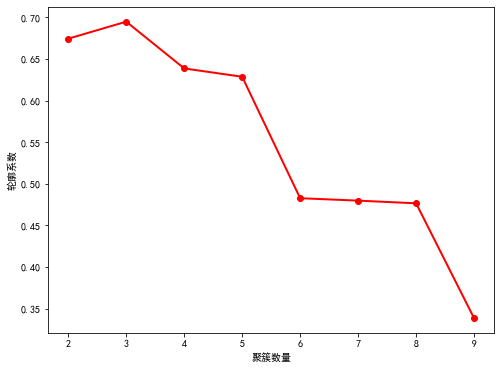

In [19]:
# 计算轮廓系数,寻找最优解K
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(8,6))

sc=[]
for i in range(2,10):
    cluster_=KMeans(n_clusters=i,random_state=0).fit(data)
    y_pre=cluster_.labels_
    sc_=silhouette_score(data,y_pre)
    sc.append(sc_)
plt.plot(range(2,10),sc,color='red',linewidth=2.0,marker='o')
plt.ylabel("轮廓系数")
plt.xlabel("聚簇数量")
plt.show()

In [20]:
from sklearn.cluster import KMeans
# 最优解 k = 3
km = KMeans(n_clusters=3)
km.fit(data)
data['cluster'] = km.labels_

In [21]:
# 降维后的轮廓系数
sil = silhouette_score(data,data['cluster'])
print("轮廓系数为:%s" % sil)

轮廓系数为:0.7003794480471616


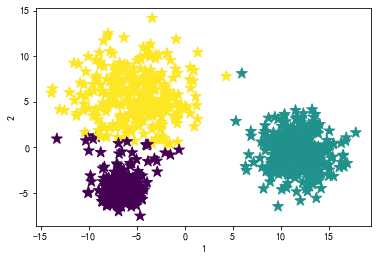

In [32]:
# 导入第三方模块
import seaborn as sns

# 三个簇的簇中心
centers = km.cluster_centers_
# 绘制聚类效果的散点图
# sns.lmplot(x = '1', y = '2', hue = 'cluster', markers = ['^','s','o'], 
#            data = data, fit_reg = False, scatter_kws = {'alpha':0.8}, legend_out = False)
# plt.scatter(centers[:,0], centers[:,1], marker = '*', color = 'black', s = 130)
plt.scatter(data['1'], data['2'], c = data['cluster'],marker='*', s = 130)
plt.xlabel('1')
plt.ylabel('2')
# 图形显示
plt.show()


# DBSCAN（基于密度）

In [108]:
import pandas as pd
import numpy as np

In [109]:
data = pd.read_csv("data/实验报告数据/data_clustering.csv")
# 去除无关数据
data = data.iloc[:,[1,2,3,4,5,6,7]]
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7
0,6.572897,-5.172835,2.741810,-2.273339,-5.050879,5.292106,3.226456
1,-7.156458,-5.985348,-5.031591,-4.150187,-8.233108,-4.271970,12.694242
2,-4.631283,1.043873,-1.362041,-8.999582,-7.406887,-1.848032,12.250691
3,-5.046997,-1.415594,-5.699884,-6.161301,-6.949402,0.926790,11.114728
4,-10.353180,-1.018143,-3.243667,-2.366646,-8.209471,-0.859586,10.090310


In [125]:
from sklearn.metrics import silhouette_score
import pandas as pd

sc=[]
ep = []
min_sa = []
for eps in np.arange(2,5,0.1):
    
    for i in range(5,20):
        cluster_=DBSCAN(eps=eps,min_samples=i).fit(data)
        y_pre=cluster_.labels_
        sc_=silhouette_score(data,y_pre)
        sc.append(sc_)
        ep.append(eps)
        min_sa.append(i)


In [126]:
df = pd.DataFrame({"轮廓系数":sc,"eps":ep,"min_sa":min_sa})
df.sort_values('轮廓系数',ascending=False)


,轮廓系数,eps,min_sa
449,0.474030,4.9,19
434,0.468865,4.8,19
433,0.468865,4.8,18
414,0.465765,4.7,14
415,0.463892,4.7,15
...,...,...,...
45,0.000575,2.3,5
46,-0.003191,2.3,6
15,-0.006569,2.1,5
30,-0.008566,2.2,5


In [127]:
from sklearn.cluster import DBSCAN
# eps:扫描半径，min_samples:一个类最小包含的点数
dbs = DBSCAN(eps=4.9,min_samples=19)
dbs.fit(data)
data['labels'] = dbs.labels_
# 统计各类的数据量
data['labels'].value_counts()

 0    342
-1    331
 1    327
Name: labels, dtype: int64

In [128]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(data,data['labels'])
print("轮廓系数为:%s" % sil)

轮廓系数为:0.4750946156935249


In [30]:
# 降维
data = data.drop("labels",axis=1)
# 使用PCA对数据将维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)
data = pd.DataFrame(data,columns=["1","2"])
data


,1,2
0,-6.252575,-5.867295
1,13.149982,-1.669001
2,11.775554,-3.080670
3,10.985019,-2.682877
4,13.225663,0.361865
...,...,...
995,-1.301244,5.524512
996,-4.453659,-5.048128
997,12.545153,1.450811
998,11.596907,-1.824583


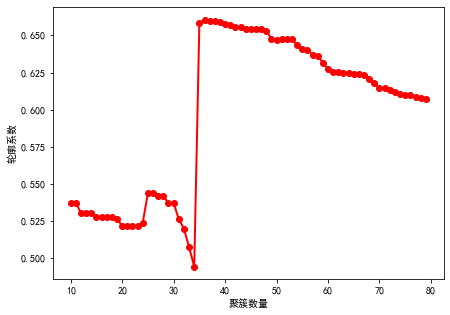

In [31]:
# 计算轮廓系数,寻找最优解K
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(7,5))

sc=[]
for i in range(10,80):
    cluster_=DBSCAN(eps=2.5,min_samples=i).fit(data)
    y_pre=cluster_.labels_
    sc_=silhouette_score(data,y_pre)
    sc.append(sc_)
plt.plot(range(10,80),sc,color='red',linewidth=2.0,marker='o')
plt.ylabel("轮廓系数")
plt.xlabel("聚簇数量")
plt.show()

In [32]:
# 计算轮廓系数,寻找最优解K
from sklearn.metrics import silhouette_score
import pandas as pd

sc=[]
ep = []
min_sa = []
for eps in np.arange(1,3,0.1):
    
    for i in range(10,80):
        cluster_=DBSCAN(eps=eps,min_samples=i).fit(data)
        y_pre=cluster_.labels_
        sc_=silhouette_score(data,y_pre)
        sc.append(sc_)
        ep.append(eps)
        min_sa.append(i)



In [33]:
df = pd.DataFrame({"轮廓系数":sc,"eps":ep,"min_sa":min_sa})
df.sort_values('轮廓系数',ascending=False)


,轮廓系数,eps,min_sa
1153,0.660943,2.6,43
1151,0.660943,2.6,41
1152,0.660943,2.6,42
1076,0.660671,2.5,36
1006,0.660106,2.4,36
...,...,...,...
111,0.092445,1.1,51
30,0.091300,1.0,40
112,0.088777,1.1,52
31,0.087581,1.0,41


In [34]:
from sklearn.cluster import DBSCAN
# eps:扫描半径，min_samples:一个类最小包含的点数
dbs = DBSCAN(eps=2.6,min_samples=43)
dbs.fit(data)
data['labels'] = dbs.labels_
# 统计各类的数据量
data['labels'].value_counts()

 0    357
 1    331
 2    283
-1     29
Name: labels, dtype: int64

In [35]:
data

,1,2,labels
0,-6.252575,-5.867295,0
1,13.149982,-1.669001,1
2,11.775554,-3.080670,1
3,10.985019,-2.682877,1
4,13.225663,0.361865,1
...,...,...,...
995,-1.301244,5.524512,2
996,-4.453659,-5.048128,0
997,12.545153,1.450811,1
998,11.596907,-1.824583,1


In [36]:
# 降维后的轮廓系数
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(data,data['labels'])
print("轮廓系数为:%s" % sil)

轮廓系数为:0.6721588130435614


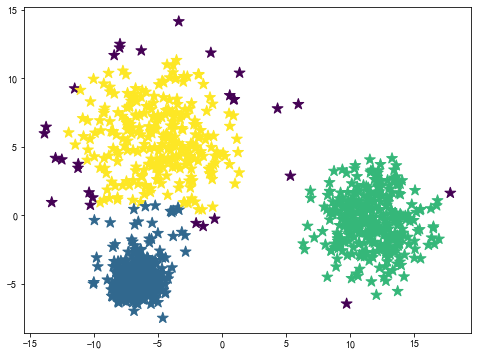

In [37]:
# # 绘制聚类效果的散点图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(8,6))
plt.scatter(data['1'], data['2'], c = data['labels'], marker = '*', s = 130)
plt.show()

# AgglomerativeClustering(基于层次)

In [96]:
from  sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
data = pd.read_csv("data/实验报告数据/data_clustering.csv")
data = data.iloc[:,[1,2,3,4,5,6,7]]
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7
0,6.572897,-5.172835,2.741810,-2.273339,-5.050879,5.292106,3.226456
1,-7.156458,-5.985348,-5.031591,-4.150187,-8.233108,-4.271970,12.694242
2,-4.631283,1.043873,-1.362041,-8.999582,-7.406887,-1.848032,12.250691
3,-5.046997,-1.415594,-5.699884,-6.161301,-6.949402,0.926790,11.114728
4,-10.353180,-1.018143,-3.243667,-2.366646,-8.209471,-0.859586,10.090310


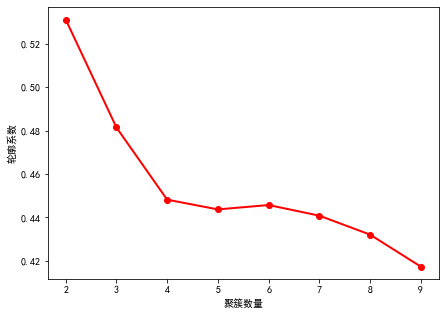

In [98]:
# 计算轮廓系数,寻找最优簇数量
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(7,5))

sc=[]
for i in range(2,10):
    cluster_=AgglomerativeClustering(n_clusters=i).fit(data)
    y_pre=cluster_.labels_
    sc_=silhouette_score(data,y_pre)
    sc.append(sc_)
plt.plot(range(2,10),sc,color='red',linewidth=2.0,marker='o')
plt.ylabel("轮廓系数")
plt.xlabel("聚簇数量")
plt.show()

In [99]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(data)
data['labels'] = agg.labels_
data['labels'].value_counts()

2    335
1    334
0    331
Name: labels, dtype: int64

In [100]:
# 轮廓系数
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(data,data['labels'])
print("轮廓系数为:%s" % sil)

轮廓系数为:0.48662306849458603


In [101]:
# 降维
data = data.drop("labels",axis=1)
# 使用PCA对数据将维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)
data = pd.DataFrame(data,columns=["1","2"])
data

,1,2
0,-6.252575,-5.867295
1,13.149982,-1.669001
2,11.775554,-3.080670
3,10.985019,-2.682877
4,13.225663,0.361865
...,...,...
995,-1.301244,5.524512
996,-4.453659,-5.048128
997,12.545153,1.450811
998,11.596907,-1.824583


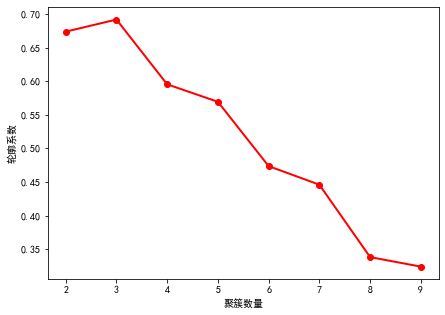

In [102]:
# 计算轮廓系数,寻找最优簇数量
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(7,5))

sc=[]
for i in range(2,10):
    cluster_=AgglomerativeClustering(n_clusters=i,linkage='average',affinity='cosine').fit(data)
    y_pre=cluster_.labels_
    sc_=silhouette_score(data,y_pre)
    sc.append(sc_)
plt.plot(range(2,10),sc,color='red',linewidth=2.0,marker='o')
plt.ylabel("轮廓系数")
plt.xlabel("聚簇数量")
plt.show()

In [106]:
agg = AgglomerativeClustering(n_clusters=3,linkage='average',affinity='cosine')
agg.fit(data)
data['labels'] = agg.labels_
data['labels'].value_counts()

2    346
1    334
0    320
Name: labels, dtype: int64

In [107]:
# 轮廓系数
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(data,data['labels'])
print("轮廓系数为:%s" % sil)

轮廓系数为:0.6974887374456571


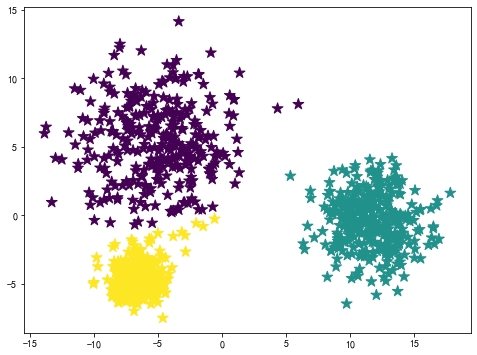

In [105]:
# # 绘制聚类效果的散点图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(8,6))
plt.scatter(data['1'], data['2'], c = data['labels'], marker = '*', s = 130)
plt.show()